# Data Preprocessing for Anomaly Detection

This notebook demonstrates the data preprocessing steps required to prepare time series data for anomaly detection using LSTM and Prophet models.

## 1. Import Libraries

First, we import the necessary libraries for data processing and visualization.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')
import os

os.chdir(r"C:\Users\Arshraj\Desktop\GitHub\TimeSeries-Anomaly-Detection-Hub")
print(os.getcwd())

C:\Users\Arshraj\Desktop\GitHub\TimeSeries-Anomaly-Detection-Hub


## 2. Load the Data

In [27]:
# Load the dataset
file_path = 'data\\walmart_sales.csv'
data = pd.read_csv(file_path,parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
data.head(3)


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2+ KB


## 3. Data Exploration

Explore the dataset to understand its structure and contents.


In [35]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 660.2+ KB


In [36]:
# Display summary statistics
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


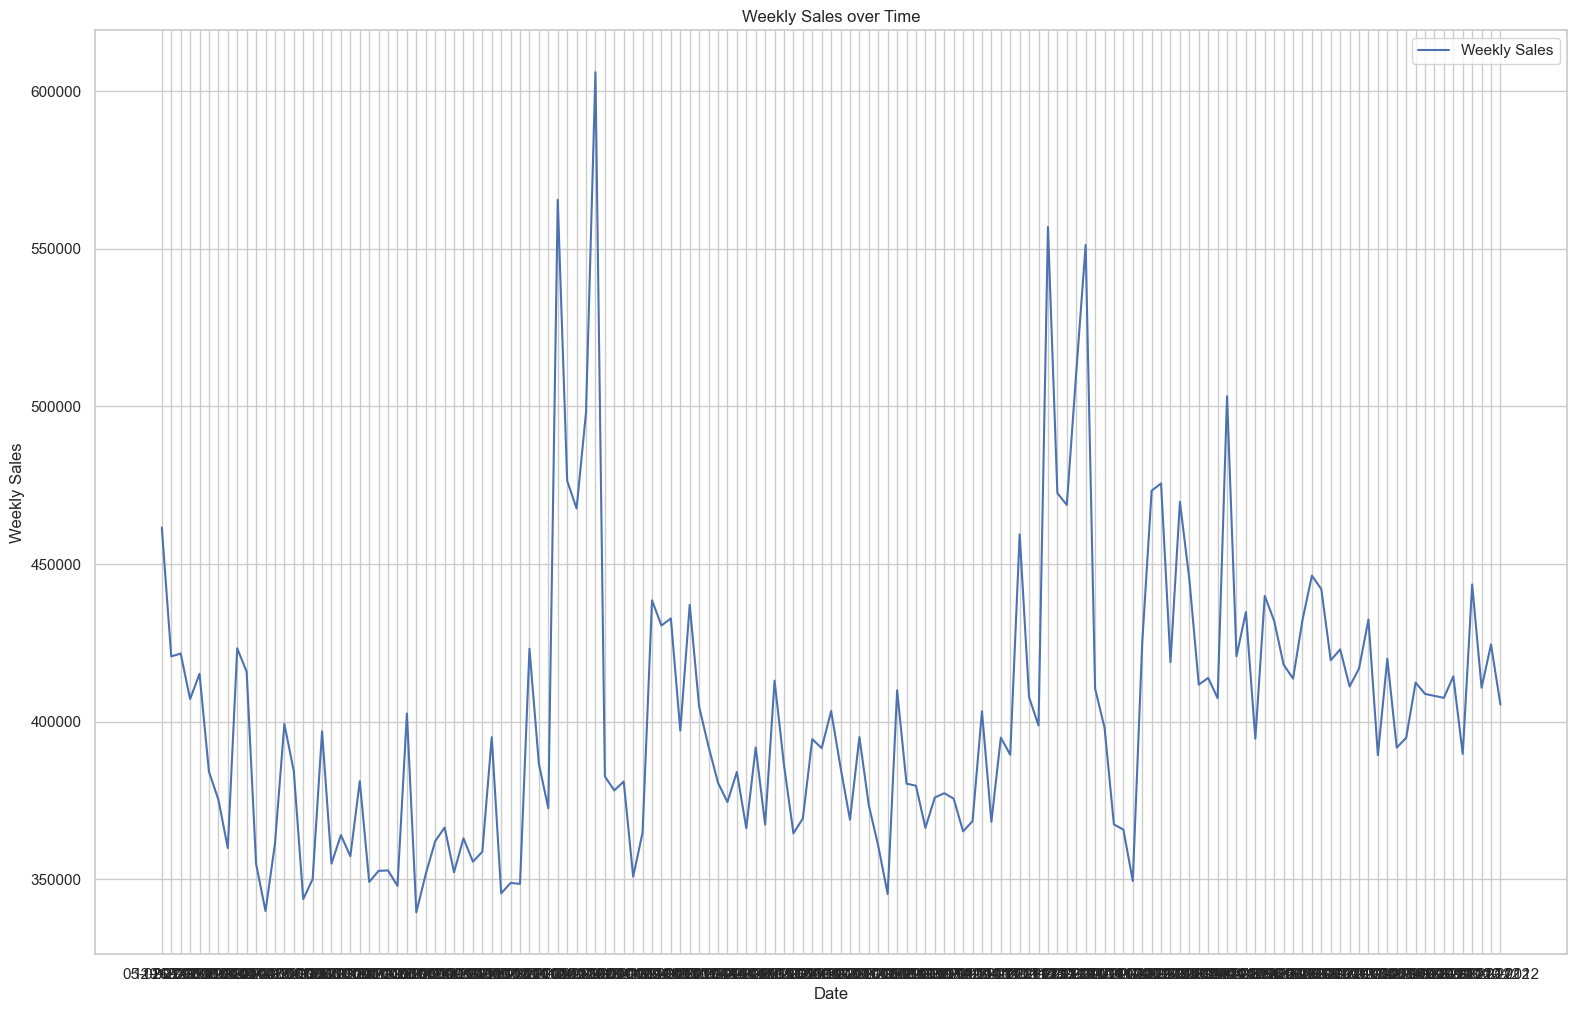

In [45]:
store_number=3

store_data=data[data["Store"]==store_number].copy()
# Plot the time series data
plt.figure(figsize=(19, 12))
plt.plot(store_data.index, store_data['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

## 4) Check Missing Values

In [46]:
store_data.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## 5. Normalize the Data

Normalize the data to prepare it for model training.


In [47]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'value' column
store_data['normalized_Weekly_Sales'] = scaler.fit_transform(store_data[['Weekly_Sales']])

# Display the first few rows of the normalized data
store_data.head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,normalized_Weekly_Sales
Date,,,,,,,,
05-02-2010,3,461622.22,0,45.71,2.572,214.424881,7.368,0.458063
12-02-2010,3,420728.96,1,47.93,2.548,214.574792,7.368,0.304556
19-02-2010,3,421642.19,0,47.07,2.514,214.619887,7.368,0.307984
26-02-2010,3,407204.86,0,52.05,2.561,214.647513,7.368,0.253788
05-03-2010,3,415202.04,0,53.04,2.625,214.675139,7.368,0.283809


## 6. Create Sequences for LSTM

Prepare the data by creating sequences for LSTM model training.


In [48]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i + sequence_length, -1].values)
        y.append(data.iloc[i + sequence_length, -1])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 50

# Create sequences
X, y = create_sequences(store_data, sequence_length)

# Display the shape of the sequences
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)


Shape of X: (93, 50)
Shape of y: (93,)


## 7. Save Preprocessed Data

Save the preprocessed data for later use.


In [50]:
# Save the normalized data
store_data.to_csv('data/preprocessed/preprocessed_walmart_sales.csv')

# Save sequences for LSTM model
np.save('data/preprocessed/X_sequences.npy', X)
np.save('data/preprocessed/y_sequences.npy', y)


## Conclusion

In this notebook, we have successfully preprocessed the time series data by handling missing values, normalizing the data, and creating sequences for LSTM model training. The preprocessed data is now ready for model training and anomaly detection.